In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from statsmodels.tools.tools import add_constant

In [28]:
class RIDGE_reg(object):
    def __init__(self, bias = True):
        self.bias = bias
    
    def fit(self, X, y, alpha:float = .01):
        self.alpha = alpha
        
        self.n_feature_ = X.shape[1]
        
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        
        if self.bias:
            X = add_constant(X)
            
        self.w_hat_ = np.linalg.inv(X.T @ X + np.diag([self.alpha for _ in range(X.shape[1])])) @ X.T @ y
        
        self.R2_ = np.sum(np.square(self.predict(X) - np.mean(y))) / np.sum(np.square(y - np.mean(y)))
        self.adj_R2_ = 1. - (( (X.shape[0] - 1) / (X.shape[0] - self.n_feature_) )*(1. - self.R2_))
        
        if self.bias:
            print(f'estimated b : {self.w_hat_[0]}')
            print(f'estimated w : {[x.item() for x in self.w_hat_[1:]]}')
            print(f'R2 : {self.R2_}')
            print(f'adjustedR2 : {self.adj_R2_}')
        else:
            print(f'estimated b : {[x.item() for x in self.w_hat_]}')
            print(f'R2 : {self.R2_}')
            print(f'adjustedR2 : {self.adj_R2_}')
            
        return self
        
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if self.bias:
            X = add_constant(X)
            return np.dot(X, self.w_hat_)
        else:
            return np.dot(X, self.w_hat_)

In [29]:
bias = 45
X, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=42
)
y = y.reshape(len(y), 1)
w

array(87.73730719)

estimated b : [46.42826066]
estimated w : [87.3659023837999]
R2 : 0.9847843265807753
adjustedR2 : 0.9847843265807753
estimated b : [46.40320371]
estimated w : [87.31470196084342]
R2 : 0.9836304878282053
adjustedR2 : 0.9836304878282053
estimated b : [44.02791483]
estimated w : [82.48050830359311]
R2 : 0.8784527771334516
adjustedR2 : 0.8784527771334516
estimated b : [7.23004421]
estimated w : [12.601237829262725]
R2 : 0.21599006144958566
adjustedR2 : 0.21599006144958566


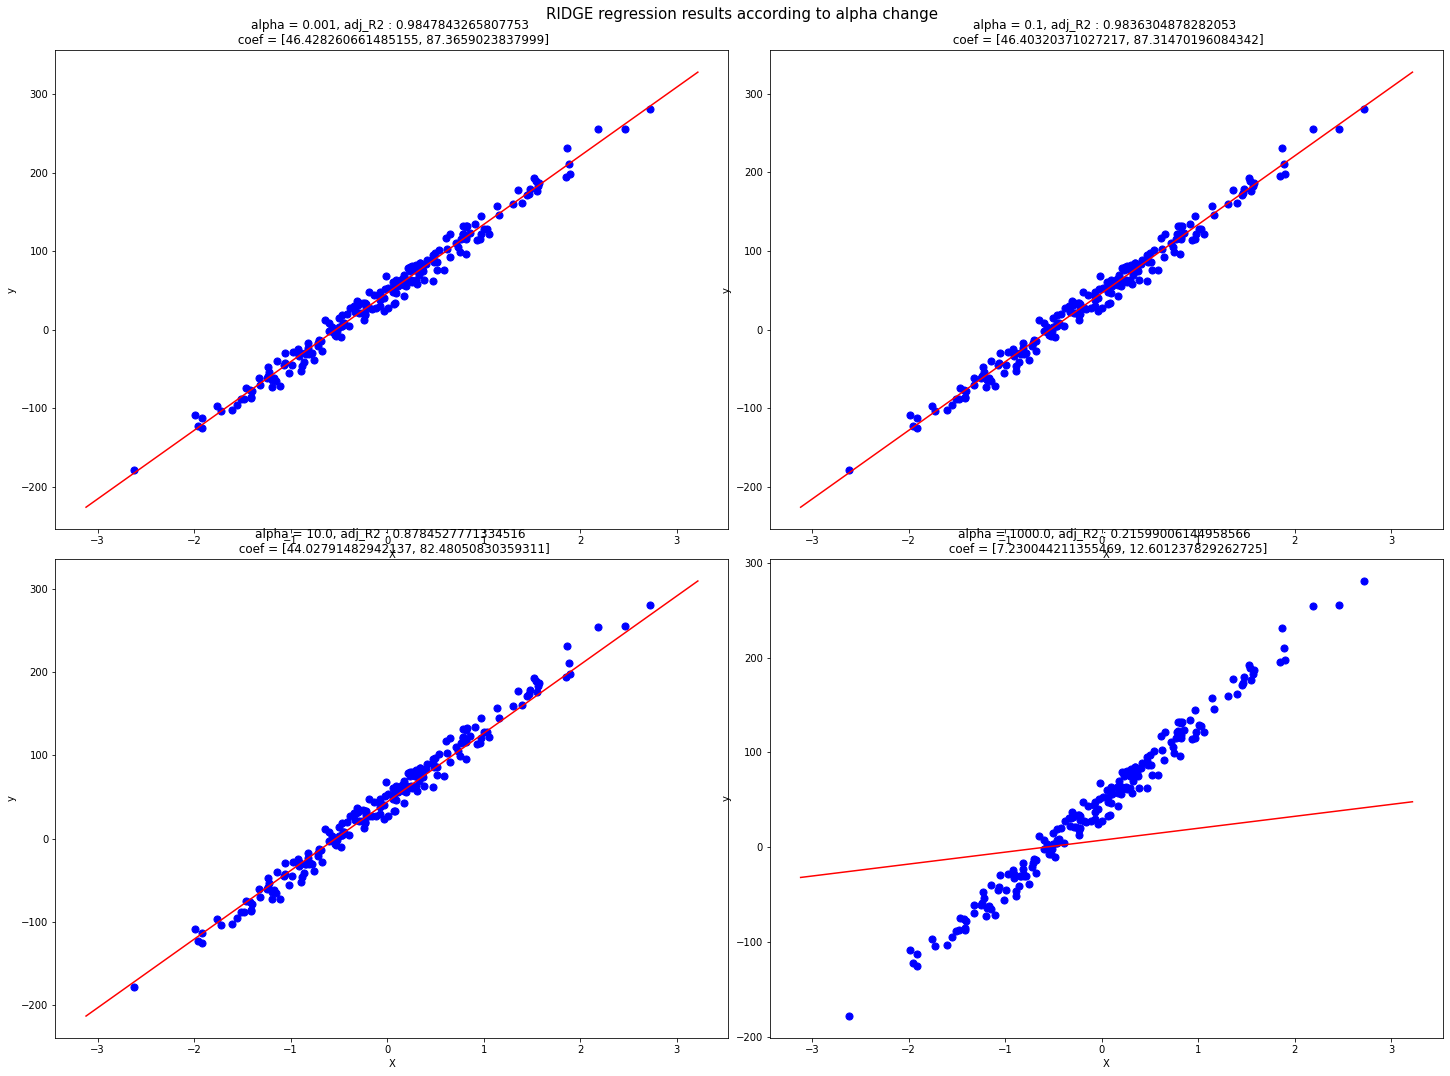

In [34]:
X_vis = np.linspace(X.min()- .5, X.max() + .5, 300)
fig, ax = plt.subplots(2,2, figsize = (20, 15))
plt.tight_layout()

for idx, a in enumerate([.001,.1,10., 1000.]):
    ridge = RIDGE_reg()
    ridge.fit(X, y, alpha = a)
    ax[idx//2, idx%2].scatter(X, y, s = 50, c = 'blue')
    ax[idx//2, idx%2].plot(X_vis, ridge.predict(X_vis), c = 'red')
    ax[idx//2, idx%2].set_xlabel('X')
    ax[idx//2, idx%2].set_ylabel('y')
    ax[idx//2, idx%2].set_title(f'alpha = {a}, adj_R2 : {ridge.adj_R2_} \n coef = {[x.item() for x in ridge.w_hat_]}')
    
plt.suptitle(f"RIDGE regression results according to alpha change", fontsize = 15)
plt.subplots_adjust(top = .94)
plt.savefig('Visualization.png')